In [1]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client['if29_projet']
collection = db['if29_projet']

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
projection = {
    'user.id': 1,
    'user.friends_count': 1, 
    'user.listed_count': 1,
    'user.favourites_count': 1, 
    'user.statuses_count': 1,
    'user.followers_count': 1,
    '_id':0
}
cursor = collection.find({},projection)
df = pd.json_normalize(cursor, max_level=1)
df = df[['user.id','user.friends_count','user.listed_count','user.favourites_count','user.statuses_count','user.followers_count']]

In [19]:
# normaliser les données quantitatives
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
Z = StandardScaler().fit_transform(X)
print(Z[:50,:])

In [21]:
# vérification
print(np.mean(Z,axis=0))
print(np.std(Z,axis=0))
# bien vérifiée que moy=0 et écart-type=1

[ 9.63300384e-19  3.27433754e-18  1.07907318e-17 -5.20535712e-18
  1.17982203e-18]
[1. 1. 1. 1. 1.]


In [22]:
# on effectue l'ACP avec ces variables quantitatives
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

In [23]:
# nombre des composantes principales
n = (acp.n_components_)
print(n)

5


In [24]:
#le pourcentage d'inertie expliquée par chaque axe
print(acp.explained_variance_ratio_)

[0.35827862 0.25804344 0.18123745 0.1468533  0.05558719]


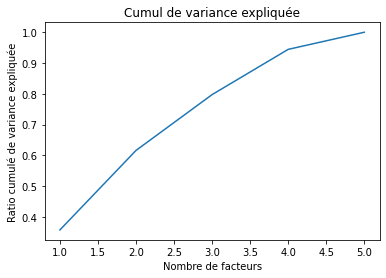

In [27]:
# le graphique de pourcentage cumulé d'inertie
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Cumul de variance expliquée")
plt.ylabel("Ratio cumulé de variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()

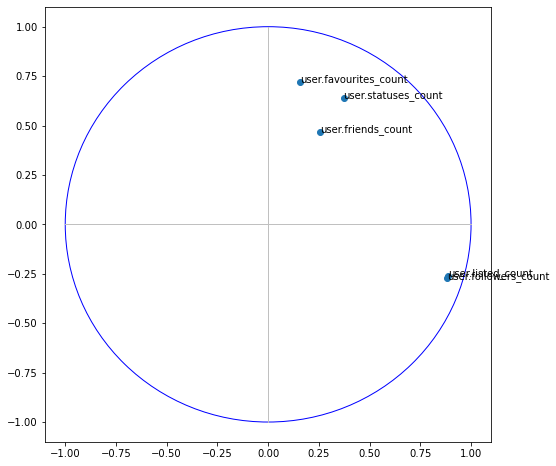

In [28]:
#Représentaion des variables dans le plan(1,2)
#calculer d'abord les coordonnées des variables dans le cercle de corrélation
vp_mat=acp.components_.T
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z)
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((5,5))
for k in range(5):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

fig, axes = plt.subplots(figsize=(8,8))

# les points
plt.scatter(corvar[:,0],corvar[:,1])

# affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(df.columns[j+1],(corvar[j,0],corvar[j,1]))

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

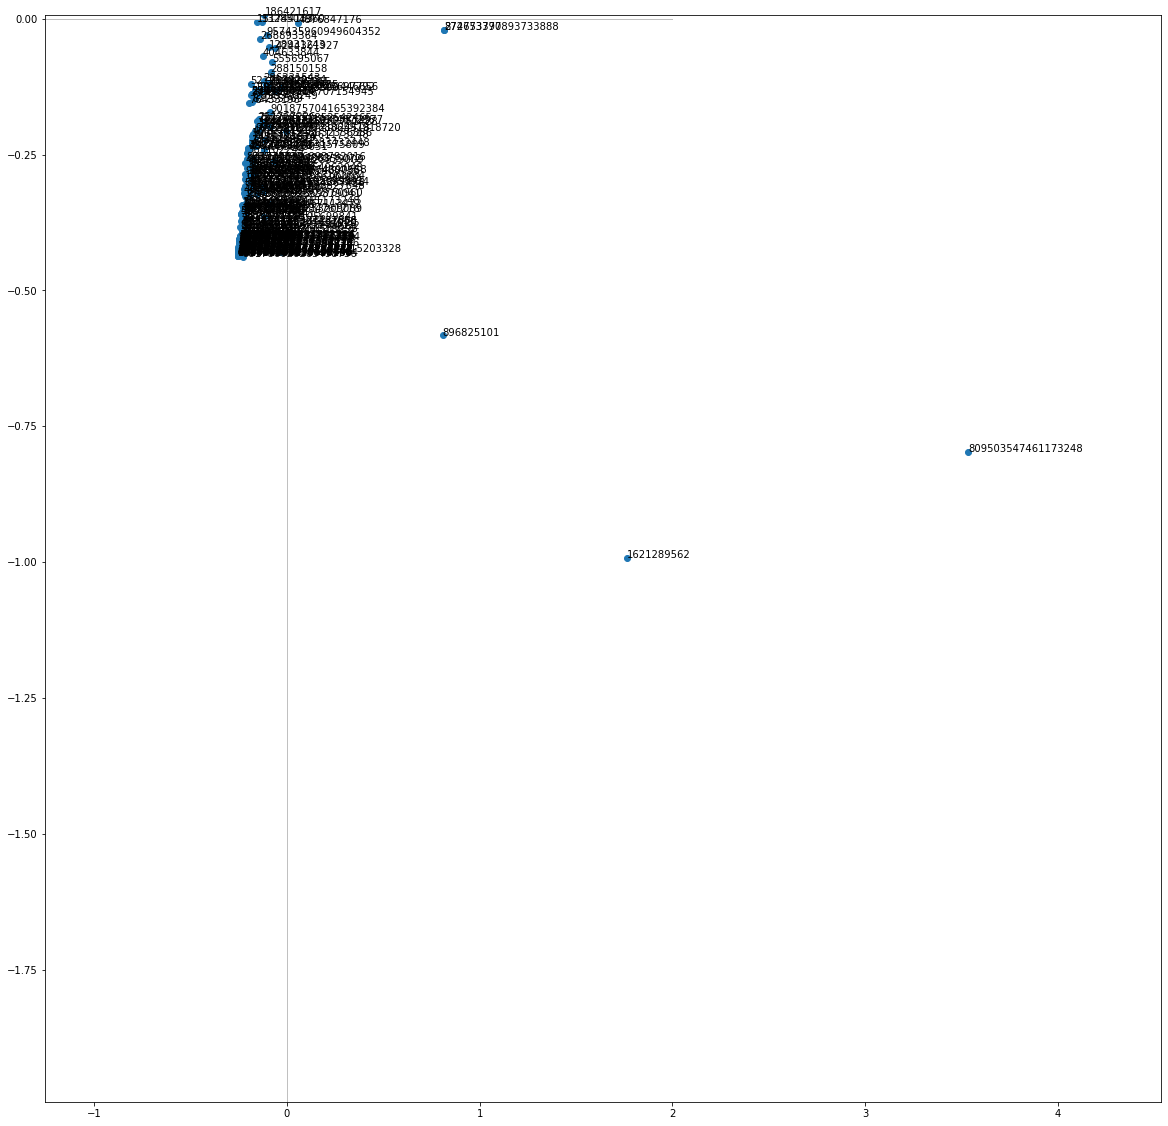

In [38]:
# Représentation des individus dans le plan (1,2)
# Création du graphique 
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(coord[:300,0].min()-1,coord[:300,0].max()+1) 
ax.set_ylim(coord[:300,1].min()-1,coord[:300,1].min()+1) 

# Placement des points
plt.scatter(coord[:300,0],coord[:300,1])

# Placement des étiquettes des observations
for i in range(300):
     plt.annotate(df.iloc[i+1,0],(coord[i,0],coord[i,1]))
# Ajout Des axes
plt.plot([-2,2],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,2],color='silver',linestyle='-',linewidth=1)

# Affichage
plt.show()